In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import seaborn as sns;sns.set()
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

In [5]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
# Download MNIST (70,000 images, 28x28 pixels)
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

X, y = mnist["data"], mnist["target"]   # X = features, y = labels
y = y.astype(int)  # convert labels from string to int

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hojjatk/mnist-dataset")

print("Path to dataset files:", path)

In [ ]:
from tensorflow.keras.datasets import mnist

# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


In [6]:
mnist_train=pd.read_csv("mnist_train.csv")
mnist_test=pd.read_csv("mnist_test.csv")
mnist_train.head( )

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
x_train,y_train = np.array(mnist_train.iloc[:,1:]),np.array(mnist_train.iloc[:,0:1])
x_test,y_test = np.array(mnist_test.iloc[:,1:]),np.array(mnist_test.iloc[:,0:1])
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000, 1)
(10000, 1)


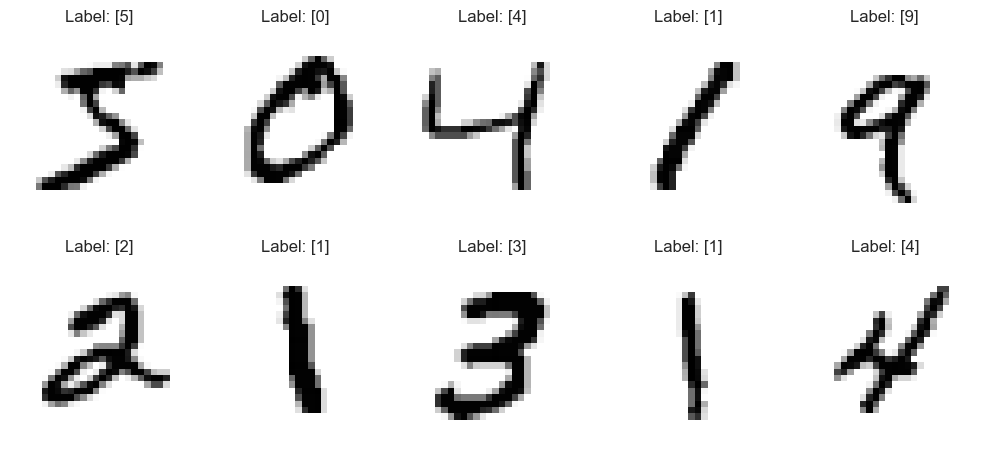

In [8]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))

for i in range(10):
    ax = axes[i // 5, i % 5]
    some_digit = x_train[i]
    some_digit_image= some_digit.reshape(28,28)
    
    ax.imshow(some_digit_image,cmap="binary")
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis("off")

plt.tight_layout()
plt.show()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


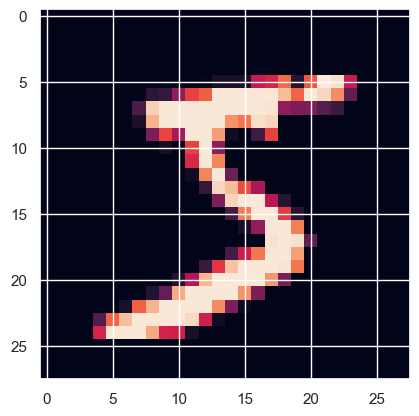

In [5]:
plt.imshow(mnist_train.iloc[0,1:].values.reshape(28,28))
mnist_train.iloc[0:1:,0:1]
mnist_train.iloc[0:1]

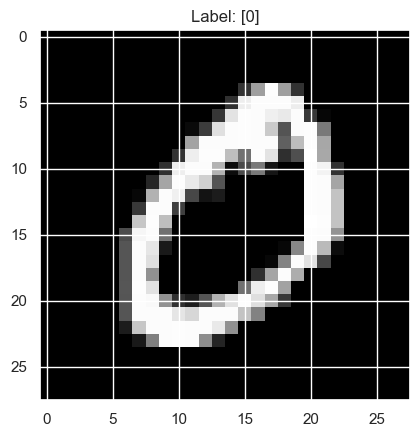

In [6]:
plt.imshow(x_train[1].reshape(28,28), cmap='gray')
plt.title(f"Label: {y_train[1]}")
plt.show()

In [9]:
y_train = y_train.ravel()
y_test  = y_test.ravel() 
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

C:\Users\Asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


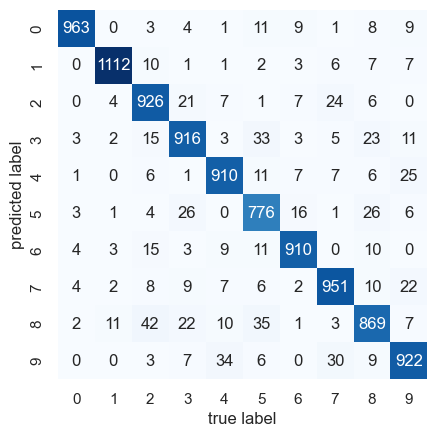

In [23]:
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square = True, annot = True,fmt = 'd', cbar = False,cmap='Blues')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig("Confusion.jpg")

In [24]:
print("Accuracy:", accuracy_score(y_pred,y_test))

Accuracy: 0.9255
